# Yahoo üzerinden finansal veri indirmek



In [2]:
!pip install YahooFinancials

    Running setup.py install for YahooFinancials: started
    Running setup.py install for YahooFinancials: finished with status 'done'


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yahoofinancials import YahooFinancials

In [4]:
def download_csv_data(ticker, start_date, end_date, freq, path):
    
    yahoo_financials = YahooFinancials(ticker)

    df = yahoo_financials.get_historical_price_data(start_date, end_date, freq)
    df = pd.DataFrame(df[ticker]['prices']).drop(['date'], axis=1) \
            .rename(columns={'formatted_date':'date'}) \
            .loc[:, ['date','open','high','low','close','volume']] \
            .set_index('date')
    df.index = pd.to_datetime(df.index)
    df['dividend'] = 0
    df['split'] = 1

    # save data to csv for later ingestion
    df.to_csv(path, header=True, index=True)

    # plot the time series
    df.close.plot(title='{} prices --- {}:{}'.format(ticker, start_date, end_date));

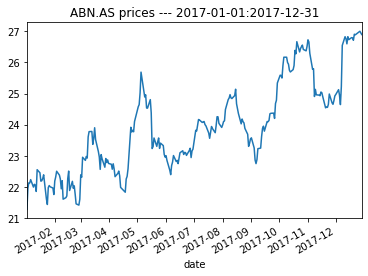

In [7]:
download_csv_data(ticker='ABN.AS', 
                  start_date='2017-01-01', 
                  end_date='2017-12-31', 
                  freq='daily', 
                  path='abn.csv')

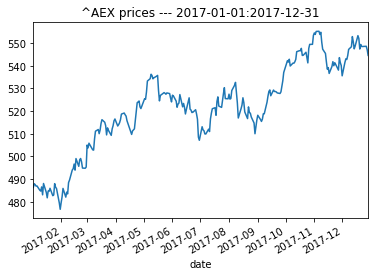

In [10]:
download_csv_data(ticker='^AEX', 
                  start_date='2017-01-01', 
                  end_date='2017-12-31', 
                  freq='daily', 
                  path='aex.csv')